- Import Packages

In [175]:
import random
import json
import matplotlib.pyplot as plt
import numpy as np

- Load Dataset

In [176]:
path = r"C:\Users\moaxs\Desktop\REU 2025\PDM Project\Code\Greedy Model\job_data.json"
with open(path, 'r') as file: 
    data = json.load(file)

- Simple Parameters

In [177]:
sample_size = 500
start_time = 0
end_time = 1440
max_length = 200

- Greedy Jobs

In [178]:
# Take a random sample of jobs
jobs_array = data['jobs']
random.shuffle (jobs_array)

# Make a flexibility statistic, create list of increasing order
for job in jobs_array: 
    job ['flexibility'] = job['deadline'] - job['release'] - job['length']

flexible_array = sorted(jobs_array, key=lambda job: job['flexibility'])

# List is same length of sample size
flexible = []

i = 0
curr_index = 0
while (i < sample_size) and curr_index < len(flexible_array):
    rj = flexible_array [curr_index]['release']
    dj = flexible_array [curr_index]['deadline']
    lj = flexible_array [curr_index]['length']
    fj = flexible_array [curr_index]['flexibility']
    if rj >= start_time and dj <= end_time and lj <= max_length:
        flexible_id = {'flexible_id' : i}
        flexible_object = {**flexible_id, **flexible_array[curr_index]}
        flexible.append(flexible_object)
        
        i += 1
    
    curr_index += 1


# List of jobs not ordered by flexibility for reference
jobs = []

i = 0
curr_index = 0
while (i < sample_size) and curr_index < len(jobs_array):
    rj = jobs_array [curr_index]['release']
    dj = jobs_array [curr_index]['deadline']
    lj = jobs_array [curr_index]['length']
    fj = jobs_array [curr_index]['flexibility']
    if rj >= start_time and dj <= end_time and lj <= max_length:
        job_id = {'job_id' : i}
        job_object = {**job_id, **jobs_array[curr_index]}
        jobs.append(job_object)
        
        i += 1
    
    curr_index += 1

In [179]:
print (flexible[:10])

print (jobs[:10])

[{'flexible_id': 0, 'release': 862, 'deadline': 880, 'length': 16, 'height': 48.96, 'flexibility': 2}, {'flexible_id': 1, 'release': 841, 'deadline': 874, 'length': 31, 'height': 298.09, 'flexibility': 2}, {'flexible_id': 2, 'release': 887, 'deadline': 1032, 'length': 143, 'height': 89.77, 'flexibility': 2}, {'flexible_id': 3, 'release': 846, 'deadline': 866, 'length': 17, 'height': 55.9, 'flexibility': 3}, {'flexible_id': 4, 'release': 534, 'deadline': 553, 'length': 16, 'height': 735.7, 'flexibility': 3}, {'flexible_id': 5, 'release': 844, 'deadline': 867, 'length': 19, 'height': 44.45, 'flexibility': 4}, {'flexible_id': 6, 'release': 862, 'deadline': 869, 'length': 3, 'height': 15.27, 'flexibility': 4}, {'flexible_id': 7, 'release': 845, 'deadline': 865, 'length': 16, 'height': 47.92, 'flexibility': 4}, {'flexible_id': 8, 'release': 665, 'deadline': 770, 'length': 101, 'height': 1187.15, 'flexibility': 4}, {'flexible_id': 9, 'release': 850, 'deadline': 863, 'length': 9, 'height': 41

- Resource Curve

In [180]:
# Instantiate the resource curve
path = r"C:\Users\moaxs\Desktop\REU 2025\PDM Project\Code\Greedy Model\solar_data.json"
with open(path, 'r') as file: 
    data = json.load(file)

wind_energy = data['series'][1]['data']
solar_energy = data['series'][2]['data']
hydro_energy = data['series'][3]['data']

# Have 165 hours and you want minute by minute resolution. Therefore the total length of this list needs to be 165 * 60 in length
# The first 60 values of the list need to equal 0, the next need to equal 1. Therefore, i // 60
wind_energy_7_days = [0 for _ in range(165 * 60)]
for i in range(len(wind_energy_7_days)):
    wind_energy_7_days[i] = wind_energy[ i // 60 ]['value']

solar_energy_7_days = [0 for _ in range(165 * 60)]
for i in range(len(solar_energy_7_days)):
    solar_energy_7_days[i] = solar_energy[ i // 60 ]['value']

hydro_energy_7_days = [0 for _ in range(165 * 60)]
for i in range(len(hydro_energy_7_days)):
    hydro_energy_7_days[i] = hydro_energy[ i // 60 ]['value']


total = []
for i in range(165 * 60):
    total_sum = wind_energy_7_days[i] + solar_energy_7_days[i] + hydro_energy_7_days[i]
    total.append(total_sum)

day = 3
resources = total[(24 * day) + start_time : (24 * day) + end_time]

- Find All Possible Start Times for Each Job

In [ ]:
intervals = [[] for _ in range(len(flexible))]
for i, job in enumerate(flexible):
    # Extract the necessary information from the job object
    release = job['release'] - start_time
    deadline = job['deadline'] - start_time
    duration = job['length']
    num = release

    # Add the execution intervals to the sublist
    while (num + duration <= deadline):
        intervals[i].append((num, num + duration))
        num += 1

# print (intervals[:5])

- Definitions

In [ ]:
# Iterate through the jobs and add their corresponding heights
height = [job['height'] for job in jobs]

# Specify the number of time steps 
num_time_steps = end_time - start_time

- Label each job and possible interval combination

In [ ]:
decision_variables = []
for j, interval_set in enumerate(intervals):
    for i, interval in enumerate(interval_set):
        # Add the decision variable and it's corresponding interval to the list
        decision_variables.append({'name' : f'x_{i}_{j}', 'value': interval})

# This is the name of the objective variable that we will minimize
objective_variable = 'd'

#print (decision_variables[:20])
#print(len(decision_variables))

- Resource curve at each time

In [187]:
total_energy = []
i = 0
while i in range(num_time_steps):
    energy_curve = wind_energy_7_days[i] + solar_energy_7_days[i] + hydro_energy_7_days[i]
    total_energy.append(energy_curve)

    i+=1  

# print(total_energy[790])

- Find the distance between resource curve and each decision variable

In [ ]:
height_score = []
for j, interval_set in enumerate(intervals):
    for i, interval in enumerate(interval_set):
        resources = total_energy[i]
        height = flexible_array[i]['height']
        score = resources - height
        height_score.append({'name' : f'x_{i}_{j}', 'value': interval, 'score': score})

#print (height_score[:20])
#print (len(height_score))

[{'name': 'x_0_0', 'value': (862, 878), 'score': 6880.76}, {'name': 'x_1_0', 'value': (863, 879), 'score': 7162.04}, {'name': 'x_2_0', 'value': (864, 880), 'score': 6912.91}, {'name': 'x_0_1', 'value': (841, 872), 'score': 6880.76}, {'name': 'x_1_1', 'value': (842, 873), 'score': 7162.04}, {'name': 'x_2_1', 'value': (843, 874), 'score': 6912.91}, {'name': 'x_0_2', 'value': (887, 1030), 'score': 6880.76}, {'name': 'x_1_2', 'value': (888, 1031), 'score': 7162.04}, {'name': 'x_2_2', 'value': (889, 1032), 'score': 6912.91}, {'name': 'x_0_3', 'value': (846, 863), 'score': 6880.76}, {'name': 'x_1_3', 'value': (847, 864), 'score': 7162.04}, {'name': 'x_2_3', 'value': (848, 865), 'score': 6912.91}, {'name': 'x_3_3', 'value': (849, 866), 'score': 7121.23}, {'name': 'x_0_4', 'value': (534, 550), 'score': 6880.76}, {'name': 'x_1_4', 'value': (535, 551), 'score': 7162.04}, {'name': 'x_2_4', 'value': (536, 552), 'score': 6912.91}, {'name': 'x_3_4', 'value': (537, 553), 'score': 7121.23}, {'name': '

- Find best interval for each job

In [ ]:
from collections import defaultdict

grouped = defaultdict(list)
for entry in height_score:
    job_idx = int(entry['name'].split('_')[-1])
    grouped[job_idx].append(entry)

selected_intervals = []
for job_idx in sorted(grouped.keys()):
    # Select the interval with the highest score for each job
    best_interval = max(grouped[job_idx], key=lambda x: x['score'])
    selected_intervals.append(best_interval)

# Now, selected_intervals contains exactly one interval per job
#print(selected_intervals[40:60])

[{'name': 'x_7_40', 'value': (673, 688), 'score': 7195.73}, {'name': 'x_7_41', 'value': (686, 768), 'score': 7195.73}, {'name': 'x_7_42', 'value': (714, 763), 'score': 7195.73}, {'name': 'x_7_43', 'value': (531, 546), 'score': 7195.73}, {'name': 'x_7_44', 'value': (862, 877), 'score': 7195.73}, {'name': 'x_7_45', 'value': (841, 860), 'score': 7195.73}, {'name': 'x_7_46', 'value': (858, 888), 'score': 7195.73}, {'name': 'x_7_47', 'value': (582, 598), 'score': 7195.73}, {'name': 'x_7_48', 'value': (530, 684), 'score': 7195.73}, {'name': 'x_7_49', 'value': (519, 636), 'score': 7195.73}, {'name': 'x_7_50', 'value': (596, 681), 'score': 7195.73}, {'name': 'x_7_51', 'value': (678, 719), 'score': 7195.73}, {'name': 'x_7_52', 'value': (853, 869), 'score': 7195.73}, {'name': 'x_7_53', 'value': (525, 670), 'score': 7195.73}, {'name': 'x_7_54', 'value': (686, 786), 'score': 7195.73}, {'name': 'x_7_55', 'value': (694, 819), 'score': 7195.73}, {'name': 'x_7_56', 'value': (673, 727), 'score': 7195.7

- Final Heights for Each Job Interval

In [190]:
final_heights = []

for idx, interval_info in enumerate(selected_intervals):
    # interval_info is a dict: {'name': ..., 'value': (start, end), 'score': ...}
    interval = interval_info['value']
    start_time_idx = interval[0]
    # Get the job index from the name (last part after '_')
    job_idx = int(interval_info['name'].split('_')[-1])
    # Get the job's height
    job_height = jobs[job_idx]['height']
    # Get the resource at the start of the interval
    resource_at_start = total_energy[start_time_idx]
    final_heights.append({
        'name': interval_info['name'],
        'interval': interval,
        'job_height': job_height,
        'resource': resource_at_start
    })

# Add the job's height to each entry in final_heights for each job in selected_intervals
for entry in final_heights:
    job_idx = int(entry['name'].split('_')[-1])
    entry['job_height'] = jobs[job_idx]['height']

print(final_heights[:20])
print (len(final_heights))

[{'name': 'x_1_0', 'interval': (863, 879), 'job_height': 1006.65, 'resource': 7435}, {'name': 'x_1_1', 'interval': (842, 873), 'job_height': 337.76, 'resource': 7435}, {'name': 'x_1_2', 'interval': (888, 1031), 'job_height': 98.34, 'resource': 7435}, {'name': 'x_1_3', 'interval': (847, 864), 'job_height': 2875.22, 'resource': 7435}, {'name': 'x_1_4', 'interval': (535, 551), 'job_height': 236.36, 'resource': 6406}, {'name': 'x_1_5', 'interval': (845, 864), 'job_height': 908.76, 'resource': 7435}, {'name': 'x_1_6', 'interval': (863, 866), 'job_height': 283.01, 'resource': 7435}, {'name': 'x_1_7', 'interval': (846, 862), 'job_height': 440.28, 'resource': 7435}, {'name': 'x_1_8', 'interval': (666, 767), 'job_height': 940.69, 'resource': 6051}, {'name': 'x_1_9', 'interval': (851, 860), 'job_height': 343.97, 'resource': 7435}, {'name': 'x_1_10', 'interval': (845, 850), 'job_height': 122.66, 'resource': 7435}, {'name': 'x_1_11', 'interval': (847, 878), 'job_height': 330.69, 'resource': 7435},

- Plot jobs

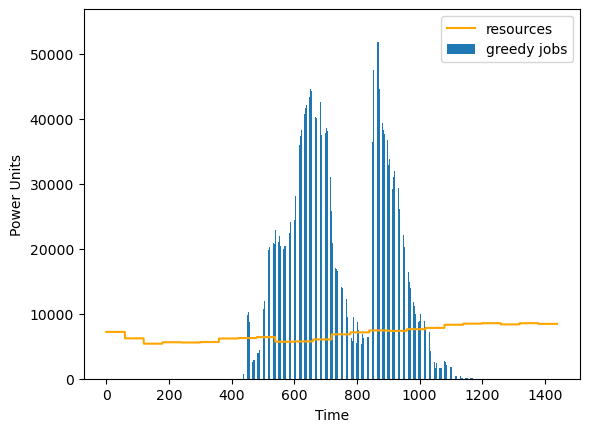

In [191]:
job_graph_xvalues = np.array([i for i in range(start_time, end_time)])

# Create an array for job heights at each time step
job_graph_yvalues = np.zeros(end_time - start_time)

# Fill in the job heights for each scheduled interval
for entry in final_heights:
	start, end = entry['interval']
	height = entry['job_height']
	# Add job height to each time slot the job occupies
	job_graph_yvalues[start:end] += height

plt.bar(job_graph_xvalues, job_graph_yvalues, label="greedy jobs", width=0.5)
plt.plot(job_graph_xvalues, total_energy, label='resources', color='orange')

plt.xlabel("Time")
plt.ylabel("Power Units")
plt.legend()
plt.show()